<a href="https://colab.research.google.com/github/HenriqueCCdA/bootCampAluraDataScience/blob/master/modulo3/desafios/Desafio_aula4_modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#1) Pre-analise
---

---
## 1.1) Bibliotecas
---

In [ ]:
import pandas as pd
from fbprophet import Prophet


---
#1.2) Funções de apoio
---

In [ ]:
def treino_teste(dados: pd.DataFrame , n: int, coluna: str) -> (pd.DataFrame, pd.DataFrame):
  '''
  -------------------------------------------------
  Divide o dados em um DataFrame de treino e teste
  -------------------------------------------------
  @param dados - DataFrame com todo os dados
  @param n - numero de termo no dataframe de treino
  @param colunas - nome da coluna 
  -------------------------------------------------
  @return retorna do df_treino, df_teste
  -------------------------------------------------
  '''
  df_treino = pd.DataFrame()
  df_treino['ds'] = dados['datahora'][:n]
  df_treino['y'] = dados[coluna][:n]

  df_teste = pd.DataFrame()
  df_teste['ds'] = dados['datahora'][n:]
  df_teste['y'] = dados[coluna][n:]

  return df_treino, df_teste

def treinamento(periodo: int , df_treino: pd.DataFrame):
  '''
  -------------------------------------------------
  Treina o modelo
  -------------------------------------------------
  @param periodo - quantidade de pontos previstos
  @param df_treino - dataframe de treino
  -------------------------------------------------
  @return retorna o modelo e a previsao
  -------------------------------------------------
  '''
  modelo = Prophet()
  modelo.fit(df_treino)
  df_futuro = modelo.make_future_dataframe(periods=periodo)
  previsao = modelo.predict(df_futuro)

  print(f'Numero de datas : {previsao.shape[0]}')

  return modelo, previsao 


## 1.3) Preparando os dados

In [ ]:
uri = "https://raw.githubusercontent.com/HenriqueCCdA/bootCampAluraDataScience/master/modulo3/dados/dados_covid_sp.csv"

dados = pd.read_csv(uri, sep=";")

dados["datahora"] = pd.to_datetime(dados["datahora"], format="%Y-%m-%d")

dados_sp = dados.query('nome_munic == "São Paulo"').copy()

dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9


In [ ]:
dados_sp.shape

(443, 26)

# 2) Desafios

---
## 2.1) Desafio 11: Identificar potenciais changepoints.
---


In [ ]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

In [ ]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=14, center=False).mean()

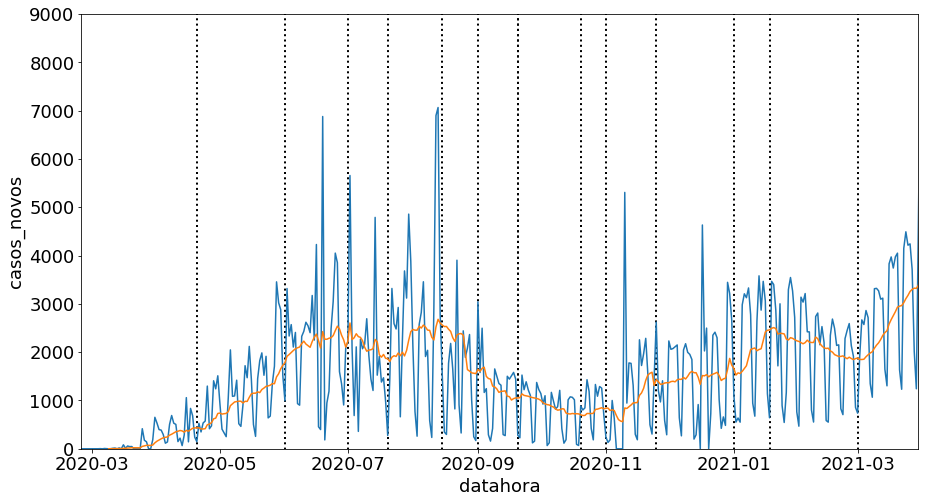

In [ ]:
ax = sns.lineplot(x='datahora', y='casos_novos', data = dados_sp)
ax = sns.lineplot(ax = ax, x='datahora', y='media_movel_casos', data = dados_sp)

c = 'black'

meus_pontos = []
# ponto1
ponto = date(year = 2020, month = 4, day = 20)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c, lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto2
ponto = date(year = 2020, month = 6, day = 1)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c, lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto3
ponto = date(year = 2020, month = 7, day = 1)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto4
ponto = date(year = 2020, month = 7, day = 20)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto5
ponto = date(year = 2020, month = 8, day = 15)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto6
ponto = date(year = 2020, month = 9, day = 1)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto7
ponto = date(year = 2020, month = 9, day = 20)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto8
ponto = date(year = 2020, month = 9, day = 20)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto9
ponto = date(year = 2020, month = 10, day = 20)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto10
ponto = date(year = 2020, month = 11, day = 1)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto11
ponto = date(year = 2020, month = 11, day = 25)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto12
ponto = date(year = 2021, month = 1, day = 1)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto13
ponto = date(year = 2021, month = 1, day = 18)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

# ponto14
ponto = date(year = 2021, month = 3, day = 1)
plt.vlines(ponto, ymin=-2000, ymax=10000, colors=c,lw = 2, ls=':')
meus_pontos.append(ponto)

plt.ylim(0, 9000)
plt.xlim(date(year = 2020, month = 2, day = 25), 
         date(year = 2021, month = 3, day = 30))

plt.show()

> Meus changepoints: usei a média movel de 14 dias como base.

In [ ]:
df_treino, df_teste = treino_teste(dados_sp, 400, "casos_novos")

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Numero de datas : 443


In [ ]:
modelo_meu_changepoints = Prophet(changepoints=meus_pontos)
modelo_meu_changepoints.fit(df_treino)
df_futuro = modelo_meu_changepoints.make_future_dataframe(periods=43)
previsao_meu_changepoints = modelo_meu_changepoints.predict(df_futuro)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
modelo = Prophet()
modelo.fit(df_treino)
df_futuro = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(df_futuro)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


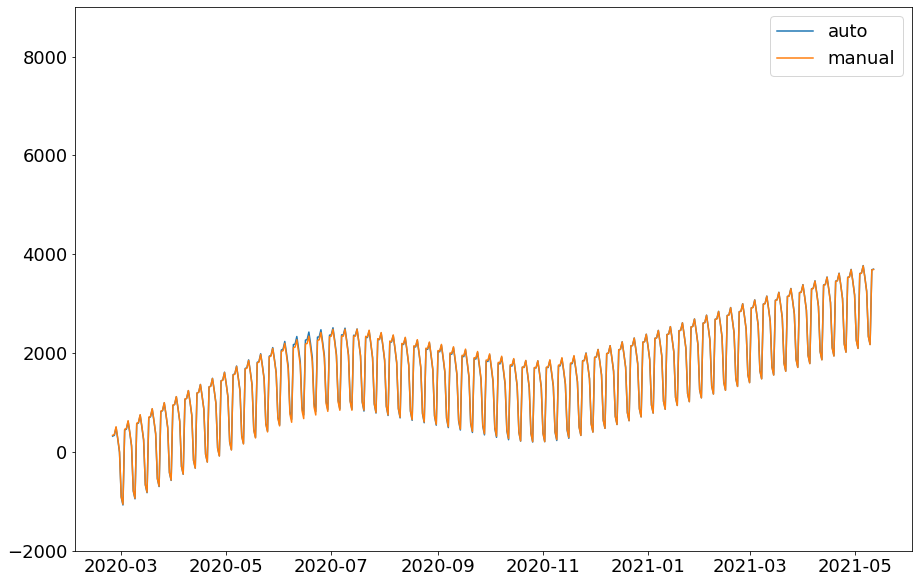

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

plt.plot(previsao['ds'], previsao['yhat'], label = 'auto')
plt.plot(previsao_meu_changepoints['ds'], previsao_meu_changepoints['yhat'], label = 'manual')

#a = add_changepoints_to_plot(ax, previsao_meu_changepoints, previsao_meu_changepoints)

plt.ylim(-2000, 9000)
plt.legend()
plt.show()

> A seleção manual dos changepoints não modificaram no modelo. Isso significa

---
## 2.2) Desafio 12: Desenvolver uma função roda o modelo automaticamente.
---

In [ ]:
df_treino, df_teste = treino_teste(dados_sp, 400, "casos_novos")
modelo, previsao = treinamento(periodo = 43, df_treino = df_treino)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Numero de datas : 443


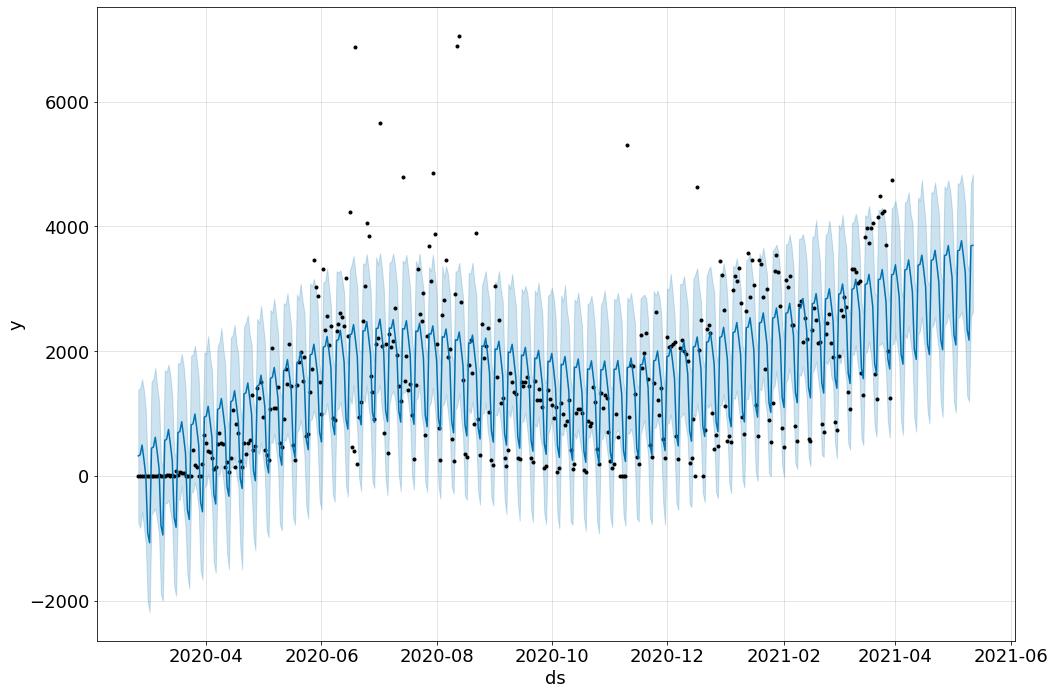

In [ ]:
fig = modelo.plot(previsao, figsize=(15,10))